In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

0.4034896592570447


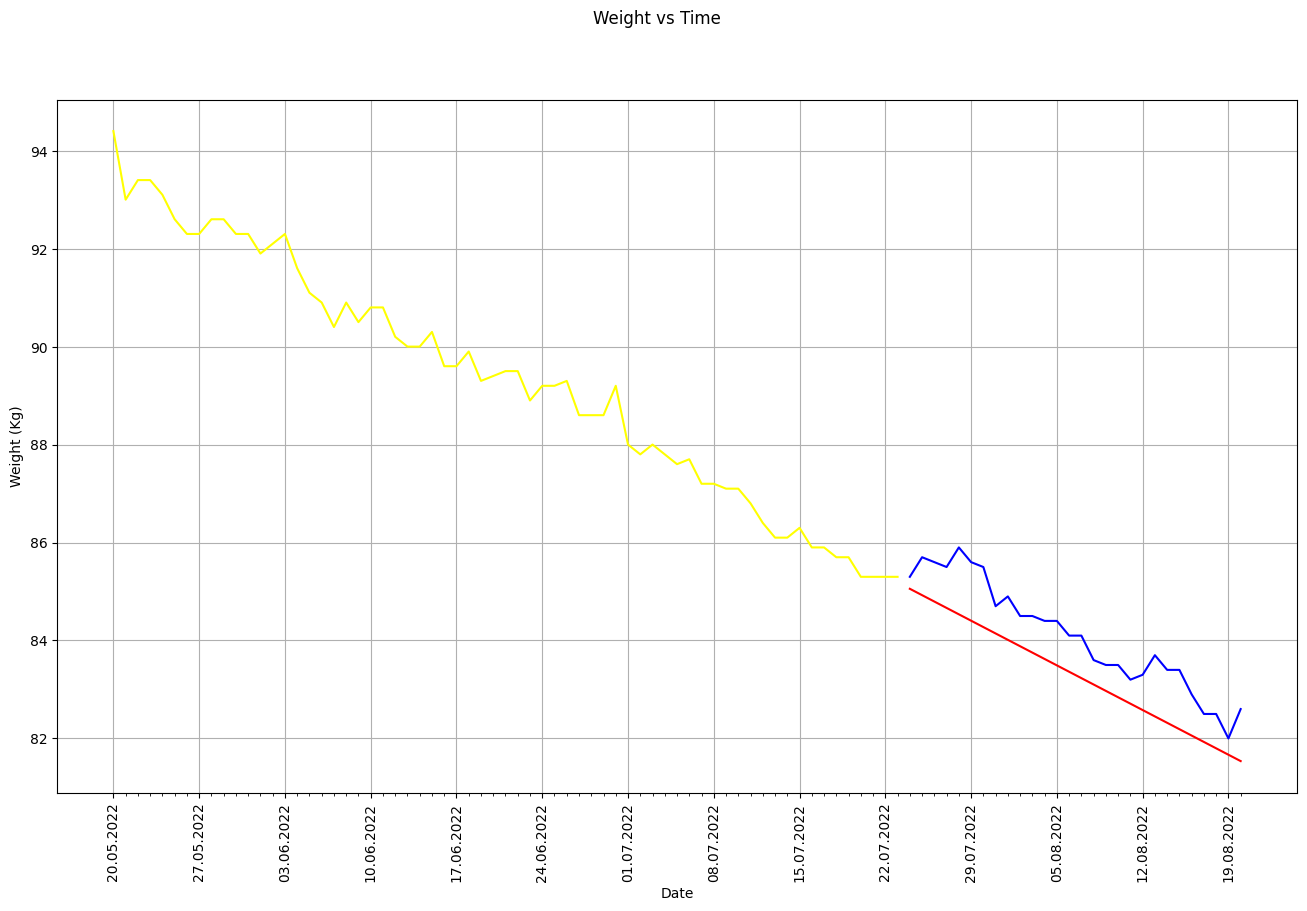

In [16]:

df = pd.read_csv("weights.csv", index_col=0, sep="\t")
df
major_ticks = range(0, len(df.index), 7)
labels = [df.index[x] for x in major_ticks]
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()

ax.set_xticks(ticks=major_ticks, labels=labels, rotation="vertical", minor=False)
ax.set_xticks(ticks=range(len(df.index)), minor=True)  # minor is the ticks inbetween major e.g |.....|...
ax.tick_params(axis="x", which="major", labelsize=10)
ax.tick_params(axis="x", which="minor", labelsize=4)
fig.suptitle("Weight vs Time")
ax.grid()

ax.set_xlabel("Date")
ax.set_ylabel("Weight (Kg)")
# line
x = np.arange(len(df.index))
y = df["weight"]

(x_train, x_test, y_train, y_test) = train_test_split(x, y, shuffle=False, train_size=0.7)

X_train = [[n] for n in x_train]
X_test = [[n] for n in x_test]

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

# ax.plot(x, y)
# plt.show()

ax.plot(X_train, y_train, color="yellow")
ax.plot(X_test, y_predicted, color="red")
ax.plot(X_test, y_test, color="blue")

r2 = r2_score(y_test, y_predicted)
print(r2)

plt.show()